In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/ner.csv")

Data Loading

In [3]:
df.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


Exploratory Analysis

In [4]:
df.describe()

,Sentence #,Sentence,POS,Tag
count,47959,47959,47959,47959
unique,47959,47575,47214,33318
top,Sentence: 1,VOA 's Mil Arcega reports .,"['NNP', 'POS', 'NNP', 'NNP', 'VBZ', '.']","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
freq,1,17,39,450


In [5]:
df.tail(2)

,Sentence #,Sentence,POS,Tag
47957,Sentence: 47958,They say not all of the rockets exploded upon ...,"['PRP', 'VBP', 'RB', 'DT', 'IN', 'DT', 'NNS', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
47958,Sentence: 47959,Indian forces said they responded to the attack,"['JJ', 'NNS', 'VBD', 'PRP', 'VBD', 'TO', 'DT',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O']"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47959 entries, 0 to 47958
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentence #  47959 non-null  object
 1   Sentence    47959 non-null  object
 2   POS         47959 non-null  object
 3   Tag         47959 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [7]:
#df.drop(['POS'], inplace=True, axis=1)

In [8]:
df.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [9]:
maxlen = max(len(s) for s in df['Sentence'])
print(maxlen)

541


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

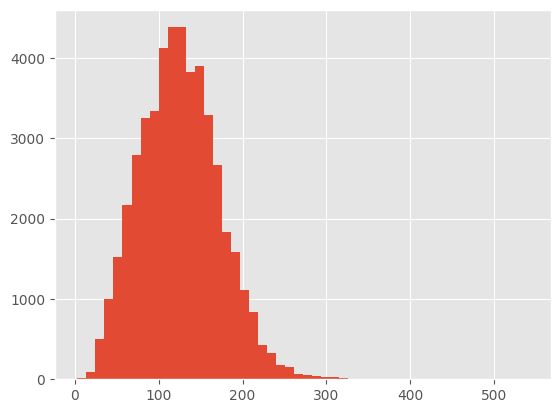

In [11]:
plt.hist([len(s) for s in df['Sentence']], bins=50)
plt.show()

Data Preprocessing

In [12]:
def getwords(s):
    return s.split()

In [13]:
def gettags(s):
    return s[2:-2].split("', '")

In [14]:
def sentence2idx(s):
    s = [word2idx[w] for w in getwords(s)]
    return s

In [15]:
def tags_list2idx(t):
    t = [tag2idx[tag] for tag in gettags(t)]
    return t

In [16]:
words_list=[getwords(s) for s in df['Sentence']]
len(words_list)
print(words_list[:4])

[['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'British', 'troops', 'from', 'that', 'country', '.'], ['Families', 'of', 'soldiers', 'killed', 'in', 'the', 'conflict', 'joined', 'the', 'protesters', 'who', 'carried', 'banners', 'with', 'such', 'slogans', 'as', '"', 'Bush', 'Number', 'One', 'Terrorist', '"', 'and', '"', 'Stop', 'the', 'Bombings', '.', '"'], ['They', 'marched', 'from', 'the', 'Houses', 'of', 'Parliament', 'to', 'a', 'rally', 'in', 'Hyde', 'Park', '.'], ['Police', 'put', 'the', 'number', 'of', 'marchers', 'at', '10,000', 'while', 'organizers', 'claimed', 'it', 'was', '1,00,000', '.']]


In [17]:
flatten_list = [j for sub in words_list for j in sub]
print(flatten_list[:100])

['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'British', 'troops', 'from', 'that', 'country', '.', 'Families', 'of', 'soldiers', 'killed', 'in', 'the', 'conflict', 'joined', 'the', 'protesters', 'who', 'carried', 'banners', 'with', 'such', 'slogans', 'as', '"', 'Bush', 'Number', 'One', 'Terrorist', '"', 'and', '"', 'Stop', 'the', 'Bombings', '.', '"', 'They', 'marched', 'from', 'the', 'Houses', 'of', 'Parliament', 'to', 'a', 'rally', 'in', 'Hyde', 'Park', '.', 'Police', 'put', 'the', 'number', 'of', 'marchers', 'at', '10,000', 'while', 'organizers', 'claimed', 'it', 'was', '1,00,000', '.', 'The', 'protest', 'comes', 'on', 'the', 'eve', 'of', 'the', 'annual', 'conference', 'of', 'Britain', "'s", 'ruling', 'Labor', 'Party', 'in']


In [18]:
words_set = set(tuple(flatten_list))
words = list(words_set)
len(words)
print(words[:10])

['Baskin', 'supper', 'Seyranlioglu', 'cloud', 'seasonal', 'abandoned', 'tenets', 'contamination', 'patrolled', 'closures']


In [19]:
tags_list=[gettags(s) for s in df['Tag']]
print(len(tags_list))
print(tags_list[:4])

47959
[['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-per', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'I-geo', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']]


In [20]:
flatten_tags = [j for sub in tags_list for j in sub]
tags_set = set(tuple(flatten_tags))
tags = list(tags_set)
print(tags[0:20])
print(len(tags))

['B-nat', 'O', 'I-art', 'I-tim', 'B-per', 'I-geo', 'I-gpe', 'B-org', 'B-gpe', 'B-tim', 'B-eve', 'I-eve', 'I-per', 'I-nat', 'I-org', 'B-art', 'B-geo']
17


In [21]:
# No of unique words and tags in the dataset
n_words = len(words)
n_tags = len(tags)
print(n_words)
print(n_tags)

35176
17


In [22]:
type(tags_list)

list

In [23]:
from collections import Counter

In [24]:
from wordcloud import WordCloud

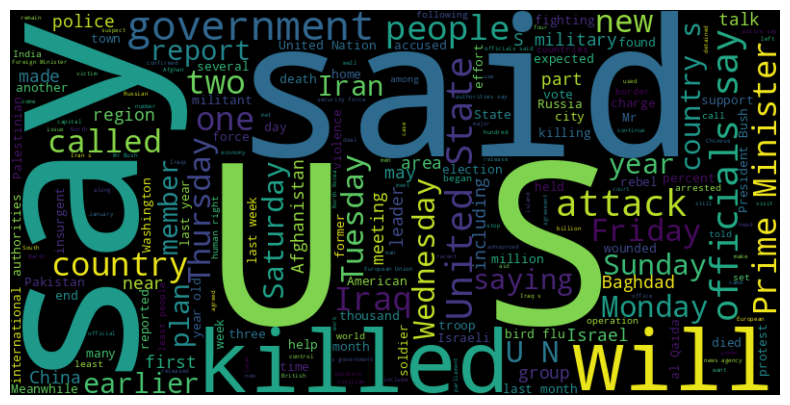

In [25]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400).generate(''.join(df['Sentence']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
from itertools import chain
def make_dict_map(data, tokentag):
    token_to_idx = {}
    idx_to_token = {}
    if tokentag == 'token':
        voc = list(set(data['Sentence'].to_list()))
    else:
        voc = list(set(data['Tag'].to_list()))
    idx_to_token = {idx:tok for  idx, tok in enumerate(voc)}
    token_to_idx = {tok:idx for  idx, tok in enumerate(voc)}
    return token_to_idx , idx_to_token

In [27]:
token_to_idx, idx_to_token = make_dict_map(df, 'token')
tag_to_idx, idx_to_tag = make_dict_map(df, 'tag')
df['Word_idx'] = df['Sentence'].map(token_to_idx)
df['Tag_idx'] = df['Tag'].map(tag_to_idx)
df_fillna = df.fillna(method='ffill', axis=0)

In [28]:
df_group = df_fillna.groupby(df['Sentence #'],as_index=False)['Sentence', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))

<ipython-input-28-311895c55698>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group = df_fillna.groupby(df['Sentence #'],as_index=False)['Sentence', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))


In [29]:
df_fillna

,Sentence #,Sentence,POS,Tag,Word_idx,Tag_idx
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '...",19911,22066
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",34074,211
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",37615,7938
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",326,19488
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",19226,32834
...,...,...,...,...,...,...
47954,Sentence: 47955,Indian border security forces are accusing the...,"['JJ', 'NN', 'NN', 'NNS', 'VBP', 'VBG', 'PRP$'...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'B-gpe...",36359,25680
47955,Sentence: 47956,Indian officials said no one was injured in Sa...,"['JJ', 'NNS', 'VBD', 'DT', 'NN', 'VBD', 'VBN',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '...",10881,17121
47956,Sentence: 47957,Two more landed in fields belonging to a nearb...,"['CD', 'JJR', 'VBD', 'IN', 'NNS', 'VBG', 'TO',...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",29691,2426
47957,Sentence: 47958,They say not all of the rockets exploded upon ...,"['PRP', 'VBP', 'RB', 'DT', 'IN', 'DT', 'NNS', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",19418,2426


Feature Selection and Extraction

In [30]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import ast

In [31]:
def preprocess_data(df):
    for i in range(len(df)):
        pos = ast.literal_eval(df['POS'][i])
        tags = ast.literal_eval(df['Tag'][i])
        df['POS'][i] = [str(word) for word in pos]
        df['Tag'][i] = [str(word.upper()) for word in tags]
    return df

In [32]:
df1 = preprocess_data(df)
df1.head()

<ipython-input-31-5dfb911fd570>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POS'][i] = [str(word) for word in pos]
<ipython-input-31-5dfb911fd570>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tag'][i] = [str(word.upper()) for word in tags]


,Sentence #,Sentence,POS,Tag,Word_idx,Tag_idx
0,Sentence: 1,Thousands of demonstrators have marched throug...,"[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-GEO, O, O, O, O, O, B-GEO...",19911,22066
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"[NNS, IN, NNS, VBN, IN, DT, NN, VBD, DT, NNS, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",34074,211
2,Sentence: 3,They marched from the Houses of Parliament to ...,"[PRP, VBD, IN, DT, NNS, IN, NN, TO, DT, NN, IN...","[O, O, O, O, O, O, O, O, O, O, O, B-GEO, I-GEO...",37615,7938
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","[NNS, VBD, DT, NN, IN, NNS, IN, CD, IN, NNS, V...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]",326,19488
4,Sentence: 5,The protest comes on the eve of the annual con...,"[DT, NN, VBZ, IN, DT, NN, IN, DT, JJ, NN, IN, ...","[O, O, O, O, O, O, O, O, O, O, O, B-GEO, O, O,...",19226,32834


In [33]:
df_final = df[['Sentence','Tag']]

df_train,df_test = train_test_split(df_final,test_size=0.2,random_state=42)
len(df_train),len(df_test)

(38367, 9592)

In [34]:
train_targets = list(df_train.Tag.values)
test_targets = list(df_test.Tag.values)

tokenizer = Tokenizer(lower=False,oov_token="UNK")
tokenizer.fit_on_texts(df_train['Sentence'])

train_inputs = tokenizer.texts_to_sequences(df_train['Sentence'])
test_inputs = tokenizer.texts_to_sequences(df_test['Sentence'])

In [35]:
word2idx = tokenizer.word_index
V = len(word2idx) # Vocab size
print("Found %s unique tokens "%V)

Found 28761 unique tokens 


In [36]:
train_tags = set([val for sublist in train_targets for val in sublist])
test_tags = set([val for sublist in test_targets for val in sublist])

print("Unique NER tags in train set: ",train_tags)
print("Unique NER tags in test set: ",test_tags)

Unique NER tags in train set:  {'B-GEO', 'O', 'B-ORG', 'I-GPE', 'I-PER', 'I-ORG', 'I-GEO', 'B-EVE', 'I-EVE', 'B-PER', 'I-TIM', 'B-ART', 'I-ART', 'B-GPE', 'I-NAT', 'B-NAT', 'B-TIM'}
Unique NER tags in test set:  {'B-GEO', 'O', 'B-ORG', 'I-GPE', 'I-PER', 'I-GEO', 'I-ORG', 'B-EVE', 'I-EVE', 'B-PER', 'I-TIM', 'B-ART', 'I-ART', 'B-GPE', 'I-NAT', 'B-NAT', 'B-TIM'}


In [37]:
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(train_targets)
train_tgt_int = tag_tokenizer.texts_to_sequences(train_targets)
test_tgt_int = tag_tokenizer.texts_to_sequences(test_targets)

In [38]:
# Max length
max_length_train = max(len(sent) for sent in train_inputs)
max_length_test = max(len(sent) for sent in test_inputs)
max_length = max(max_length_train,max_length_test)

# Pad input sequences
train_inputs_final = pad_sequences(train_inputs,maxlen=max_length,padding="post")
print("Shape of train inputs: ",train_inputs_final.shape)

test_inputs_final = pad_sequences(test_inputs,maxlen=max_length,padding="post")
print("Shape of test inputs: ",test_inputs_final.shape)

train_targets_final = pad_sequences(train_tgt_int,maxlen=max_length,padding="post")
print("Shape of train targets: ",train_targets_final.shape)

test_targets_final = pad_sequences(test_tgt_int,maxlen=max_length,padding="post")
print("Shape of test targets: ",test_targets_final.shape)

Shape of train inputs:  (38367, 89)
Shape of test inputs:  (9592, 89)
Shape of train targets:  (38367, 89)
Shape of test targets:  (9592, 89)


In [51]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [67]:
# Preprocess the text column (e.g., remove punctuation, lowercase)
# Assuming your text column is named 'text'
df1['Sentence'] = df1['Sentence'].str.replace('[^\w\s]', '').str.lower()

<ipython-input-67-3fbdc4ed2a65>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Sentence'] = df1['Sentence'].str.replace('[^\w\s]', '').str.lower()


In [68]:
# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

In [52]:
# Tokenization
df1['tokens'] = df1['Sentence'].apply(word_tokenize)

In [72]:
# Fit and transform the text data
word_counts = count_vectorizer.fit_transform(df1['Sentence'])

In [74]:
# Get the top 15 most frequent words
word_freq = word_counts.sum(axis=0)
word_freq_sorted = sorted(zip(word_freq.tolist()[0], count_vectorizer.get_feature_names_out()), reverse=True)[:15]

In [75]:
word_freq_df = pd.DataFrame({'word': feature_names, 'count': word_freq.tolist()[0]})

In [76]:
top_15_words = word_freq_df.sort_values(by='count', ascending=False).head(15)
top_15_words

,word,count
24457,said,5329
24717,says,4640
24711,say,4178
21922,president,3396
20042,officials,3390
12558,government,3112
18840,mr,3086
15963,killed,2861
21058,people,2756
19446,new,2151


In [53]:
# Stopword removal
stop_words = set(stopwords.words('english'))
df1['tokens'] = df1['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [73]:
feature_names = count_vectorizer.get_feature_names_out()

In [55]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df1['tokens'] = df1['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Embeddings

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.models import Word2Vec

In [57]:
# Load a pre-trained Word2Vec model
word2vec_model = Word2Vec(df1['tokens'], vector_size=100, window=5, min_count=1, sg=0)

In [58]:
from gensim.models import FastText
import os

In [59]:
# Training the FastText model
fasttext_model = FastText(sentences=df1['tokens'], vector_size=100, window=5, min_count=1, sg=0, workers=4)

# Saving the FastText model
save_dir = '/content/drive/MyDrive/ner'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save the FastText model in the specified location
model_path = os.path.join(save_dir, 'fasttext.model')
fasttext_model.save(model_path)

print("FastText word vectors trained and saved in:", model_path)

FastText word vectors trained and saved in: /content/drive/MyDrive/ner/fasttext.model


In [60]:
# Loading the FastText model
model_path = '/content/drive/MyDrive/ner/fasttext.model'
fasttext_model = FastText.load(model_path)

# Comparison of Similar Words:

In [78]:
similar_words1 = word2vec_model.wv.most_similar("word", topn=15)
print(similar_words1)

[('nothing', 0.9461715817451477), ('dubbed', 0.9356050491333008), ('replied', 0.9346858263015747), ('What', 0.9325410723686218), ('enemy', 0.9319391846656799), ('know', 0.9298142194747925), ('imminent', 0.9288337230682373), ('name', 0.9271369576454163), ('FALSE', 0.9270705580711365), ('O', 0.9269192814826965), ('specific', 0.9266634583473206), ('unacceptable', 0.9262023568153381), ('act', 0.9257694482803345), ('chip', 0.9253958463668823), ('Not', 0.9247600436210632)]


In [80]:
def find_similar_words(word, topn=10):
    try:
        similar_words = word2vec_model.wv.most_similar(word, topn=topn)
        return similar_words
    except KeyError:
        return []

In [81]:
# Compare words similar to the top 15 most frequent words using Word To Vectorizer
for word in top_15_words['word']:
    similar_words = find_similar_words(word)
    print(f"Words similar to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity}")
    print()

Words similar to 'said':
saying: 0.8252713680267334
specify: 0.8188714981079102
warned: 0.8013161420822144
lawbreaker: 0.7807849645614624
added: 0.7770865559577942
say: 0.766218900680542
commended: 0.7401552796363831
acknowledged: 0.7327850461006165
urged: 0.7309261560440063
called: 0.7273918986320496

Words similar to 'says':

Words similar to 'say':
alerted: 0.77428138256073
said: 0.7662189602851868
Arjun: 0.7370484471321106
warned: 0.7268960475921631
veterinary: 0.7235101461410522
Ireju: 0.7154476046562195
Boisvert: 0.7054631114006042
confirm: 0.6990598440170288
believe: 0.6981349587440491
lawbreaker: 0.6973815560340881

Words similar to 'president':
lawmaker: 0.8647729754447937
presidential: 0.8308948874473572
cabinet: 0.821928083896637
parliament: 0.8193014860153198
Mr.: 0.8183450698852539
candidate: 0.8150442838668823
President: 0.8140666484832764
al-Mashhadani: 0.8100395798683167
Aides: 0.8049198389053345
President-elect: 0.7948630452156067

Words similar to 'officials':

Words 

In [61]:
def find_similar_words_fasttext(word, topn=10):
    try:
        similar_words = fasttext_model.wv.most_similar(word, topn=topn)
        return similar_words
    except KeyError:
        return []

In [77]:
for word in top_15_words['word']:
    similar_words = find_similar_words_fasttext(word)
    print(f"Words similar to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity}")
    print()

Words similar to 'said':
Osaid: 0.9674153327941895
saga: 0.9177714586257935
Zaid: 0.8827095627784729
sail: 0.8728014826774597
saw: 0.856913149356842
Aid: 0.848196804523468
sat: 0.8297234773635864
sailor: 0.8293582797050476
Said: 0.827808141708374
salsa: 0.8240407705307007

Words similar to 'says':
saga: 0.9568953514099121
saw: 0.927905261516571
say: 0.9238796234130859
sat: 0.8955643773078918
salsa: 0.8946036100387573
said: 0.8801174759864807
samba: 0.856758713722229
sail: 0.8504920601844788
safe: 0.8407792448997498
Osaid: 0.8349349498748779

Words similar to 'say':
essay: 0.8748603463172913
saga: 0.8523557782173157
Lindsay: 0.8440790176391602
sat: 0.7998731732368469
said: 0.7985197305679321
sad: 0.7980924248695374
Alasay: 0.7953932285308838
saw: 0.7856464982032776
salsa: 0.7737382650375366
samba: 0.7732890248298645

Words similar to 'president':
ex-president: 0.9955810904502869
then-president: 0.9909661412239075
vice-president: 0.9889857172966003
ex-President: 0.9827543497085571
reside

In [85]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.7 MB/s eta 0:00:00


In [86]:
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline


In [88]:
# Load the pre-trained model and tokenizer (choose the desired model)
model_name = "dbmdz/bert-large-cased-finetuned-conll03-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [89]:
# NER pipeline using the pre-trained model
nlp_ner = pipeline("ner", model=model, tokenizer=tokenizer)

# Sample text for NER
text = "Apple Inc. is an American multinational technology company headquartered in Cupertino, California."


In [ ]:

# Perform NER on the text
ner_results =nlp_ner(Sentence)